<a href="https://colab.research.google.com/github/miketech-traces/fynesse_mlfc/blob/main/Agricultural_Productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kenyan Agricultural Productivity Forecasting at the County Level Using Demographic and Environmental Information

In [32]:
import pandas as pd
import requests
import os

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paulmaluki/kenyapopulationdistibution-2019-censuscsv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'kenyapopulationdistibution-2019-censuscsv' dataset.
Path to dataset files: /kaggle/input/kenyapopulationdistibution-2019-censuscsv


In [ ]:
# Path returned from kagglehub
path = kagglehub.dataset_download("paulmaluki/kenyapopulationdistibution-2019-censuscsv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'kenyapopulationdistibution-2019-censuscsv' dataset.
Path to dataset files: /kaggle/input/kenyapopulationdistibution-2019-censuscsv


In [34]:
print(os.listdir(path))

['kenya-population-distibution-2019-census.csv']


In [35]:
# Load the dataset (replace with actual CSV name if different)
df = pd.read_csv(os.path.join(path, "kenya-population-distibution-2019-census.csv"))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   County    48 non-null     object
 1   Total     48 non-null     object
 2   Male      48 non-null     object
 3   Female    48 non-null     object
 4   Intersex  48 non-null     object
dtypes: object(5)
memory usage: 2.0+ KB


In [37]:
df.head()

,County,Total,Male,Female,Intersex
0,KENYA,"14,831,700","7,352,134","7,478,883",683
1,Mombasa,"1,208,333","610,257","598,046",30
2,Kwale,"126,431","62,395","64,031",5
3,Kilifi,"393,888","191,324","202,558",6
4,Tana River,"75,722","37,854","37,867",1


In [38]:
df.tail()

,County,Total,Male,Female,Intersex
43,Homa Bay,"113,079","53,569","59,506",4
44,Migori,"167,200","80,300","86,896",4
45,Kisii,"151,410","73,924","77,478",8
46,Nyamira,"47,036","22,666","24,370",-
47,Nairobi City,"4,397,073","2,192,452","2,204,376",245


In [40]:
census_path = kagglehub.dataset_download("paulmaluki/kenyapopulationdistibution-2019-censuscsv")

Using Colab cache for faster access to the 'kenyapopulationdistibution-2019-censuscsv' dataset.


In [41]:
census = pd.read_csv(f"{census_path}/kenya-population-distibution-2019-census.csv")

# statistics summary

In [ ]:
df.describe()

,County,Total,Male,Female,Intersex
count,48,48,48,48,48
unique,48,48,48,47,21
top,KENYA,"14,831,700","7,352,134","37,867",5
freq,1,1,1,2,7


In [ ]:
print(df.head())
print(df.info())
print(df.describe())

       County       Total       Male     Female Intersex
0       KENYA  14,831,700  7,352,134  7,478,883      683
1     Mombasa   1,208,333    610,257    598,046       30
2       Kwale     126,431     62,395     64,031        5
3      Kilifi     393,888    191,324    202,558        6
4  Tana River      75,722     37,854     37,867        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   County    48 non-null     object
 1   Total     48 non-null     object
 2   Male      48 non-null     object
 3   Female    48 non-null     object
 4   Intersex  48 non-null     object
dtypes: object(5)
memory usage: 2.0+ KB
None
       County       Total       Male  Female Intersex
count      48          48         48      48       48
unique     48          48         48      47       21
top     KENYA  14,831,700  7,352,134  37,867        5
freq        1           1    

In [ ]:
print(df.columns)


Index(['County', 'Total', 'Male', 'Female', 'Intersex'], dtype='object')


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("philemonkiplangat/agriculture-in-kenyan-counties-and-forests-areas")

print("Path to dataset files:", path)

100%|██████████| 6.32k/6.32k [00:00<00:00, 2.89MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/philemonkiplangat/agriculture-in-kenyan-counties-and-forests-areas/versions/1


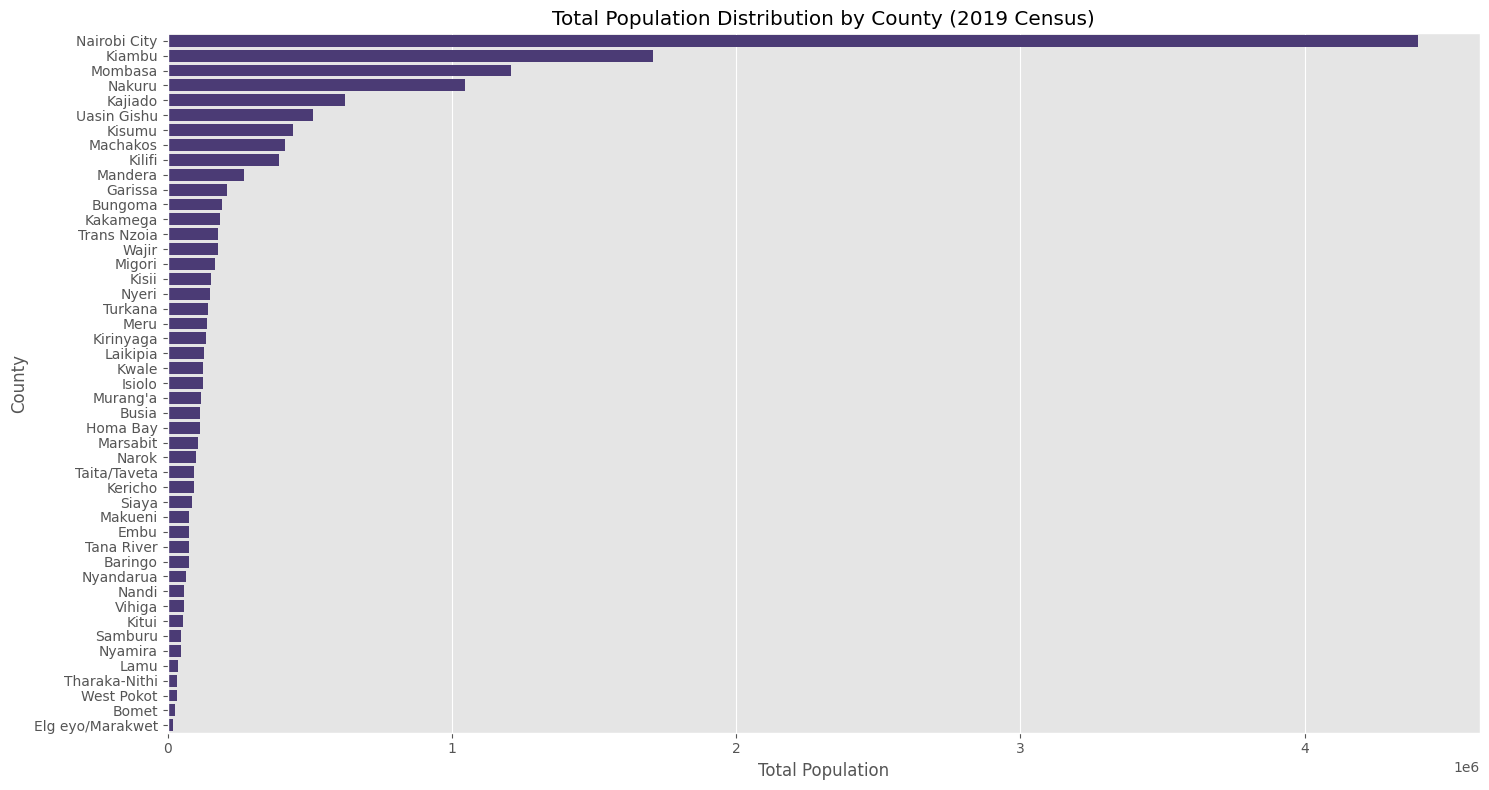

In [42]:
# Clean and convert population columns to numeric
for col in ['Total', 'Male', 'Female', 'Intersex']:
    census[col] = census[col].astype(str).str.replace(',', '', regex=False)
    census[col] = pd.to_numeric(census[col], errors='coerce')

# Drop the 'KENYA' row as it represents the total for all counties
census_viz = census[census['County'] != 'KENYA'].copy()

# Sort by total population for better visualization
census_viz = census_viz.sort_values('Total', ascending=False)

# Create a bar chart for total population distribution by county
plt.figure(figsize=(15, 8))
sns.barplot(x='Total', y='County', data=census_viz)
plt.title('Total Population Distribution by County (2019 Census)')
plt.xlabel('Total Population')
plt.ylabel('County')
plt.tight_layout()
plt.show()

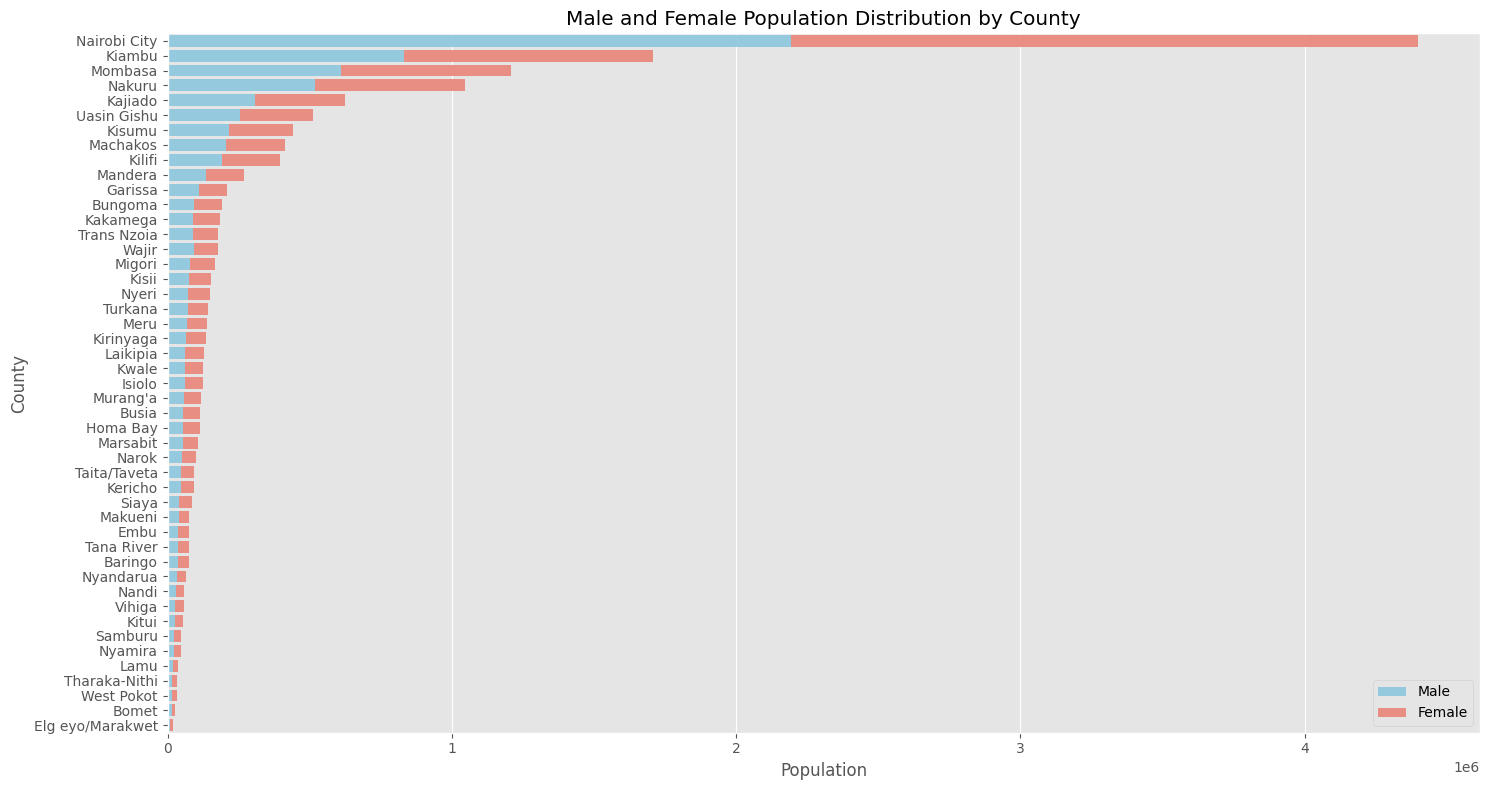

In [47]:
plt.figure(figsize=(15, 8))
# Create a stacked bar chart with 'Male' and 'Female' populations
sns.barplot(x='Male', y='County', data=census_viz, color='skyblue', label='Male')
sns.barplot(x='Female', y='County', data=census_viz, color='salmon', left=census_viz['Male'], label='Female')
plt.title('Male and Female Population Distribution by County')
plt.xlabel('Population')
plt.ylabel('County')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(os.listdir(path))

['project_data_set.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, "project_data_set.csv"))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Counties                 59 non-null     object 
 1    TOTAL HOUSHOLDS         59 non-null     int64  
 2   Farming                  58 non-null     float64
 3   Crop Production          59 non-null     int64  
 4   Livestock Production     59 non-null     int64  
 5   Aquaculture              59 non-null     int64  
 6   Fishing                  59 non-null     int64  
 7   Irrigation               59 non-null     int64  
 8   Maize                    59 non-null     int64  
 9   Sorghum                  49 non-null     float64
 10  Rice                     40 non-null     float64
 11  Potatoes                 52 non-null     float64
 12  Beans                    52 non-null     float64
 13  Cassava                  52 non-null     float64
 14  Sweet Potatoes           45 

In [ ]:
df.head()

,Counties,TOTAL HOUSHOLDS,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Indigenous Chicken,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages,Population (2019),Area sq km,density per sq km
0,MOMBASA,378422,12497.0,7218,8749,128,1409,958,5681,NaN,...,6142,743,998,68,186,83.0,24.0,1208333.0,219.9,5495.0
1,KWALE,173176,108074.0,100020,72666,220,4452,2438,93143,2784.0,...,56196,962,836,573,179,201.0,57.0,866820.0,8267.1,105.0
2,KILIFI,298472,161188.0,149334,101983,366,6393,5643,143913,2911.0,...,72134,1484,1807,611,524,333.0,50.0,1453787.0,12539.7,116.0
3,TANA RIVER,68242,35094.0,16723,27046,212,2136,4528,13141,472.0,...,10187,1019,616,1066,38,176.0,48.0,315943.0,37950.5,8.0
4,LAMU,37963,18678.0,15196,13448,65,3162,1083,13698,818.0,...,10362,385,253,302,62,54.0,15.0,143920.0,6253.3,23.0


In [ ]:
df.tail()

,Counties,TOTAL HOUSHOLDS,Farming,Crop Production,Livestock Production,Aquaculture,Fishing,Irrigation,Maize,Sorghum,...,Indigenous Chicken,Exotic Chicken Layers,Exotic Chicken Broilers,Beehives,Rabbits,Fish Ponds,Fish Cages,Population (2019),Area sq km,density per sq km
54,HOMA BAY,262036,193812.0,184367,127914,1056,17770,5214,179727,68877.0,...,3457,1780,608,762,939,174.0,NaN,1131950.0,3152.5,359.0
55,MIGORI,240168,169958.0,160703,112935,915,6807,2995,156039,28039.0,...,2942,1515,1512,822,848,116.0,NaN,1116436.0,2613.5,427.0
56,KISII,308054,219853.0,207400,148742,810,1069,2972,194138,31358.0,...,11297,3856,666,1328,768,112.0,NaN,1266860.0,1323.0,958.0
57,NYAMIRA,150669,110028.0,102856,78946,461,509,1275,89330,10634.0,...,5932,1923,762,760,440,64.0,NaN,605576.0,897.3,675.0
58,NAIROBI,1506888,32258.0,16359,22818,279,697,3343,9867,NaN,...,3432,1813,154,1253,208,57.0,NaN,4397073.0,703.9,6247.0


In [ ]:
df.isnull().sum()

,0
Counties,0
TOTAL HOUSHOLDS,0
Farming,1
Crop Production,0
Livestock Production,0
Aquaculture,0
Fishing,0
Irrigation,0
Maize,0
Sorghum,10


In [ ]:
print(df.head())
print(df.info())
print(df.describe())


     Counties   TOTAL HOUSHOLDS   Farming  Crop Production  \
0     MOMBASA            378422   12497.0             7218   
1       KWALE            173176  108074.0           100020   
2      KILIFI            298472  161188.0           149334   
3  TANA RIVER             68242   35094.0            16723   
4        LAMU             37963   18678.0            15196   

   Livestock Production  Aquaculture  Fishing  Irrigation   Maize  Sorghum  \
0                  8749          128     1409         958    5681      NaN   
1                 72666          220     4452        2438   93143   2784.0   
2                101983          366     6393        5643  143913   2911.0   
3                 27046          212     2136        4528   13141    472.0   
4                 13448           65     3162        1083   13698    818.0   

   ...  Indigenous Chicken  Exotic Chicken Layers  Exotic Chicken Broilers  \
0  ...                6142                    743                      998   
1 

In [ ]:
import pandas as pd
import kagglehub
import os

# Download datasets
census_path = kagglehub.dataset_download("paulmaluki/kenyapopulationdistibution-2019-censuscsv")
agriculture_path = kagglehub.dataset_download("philemonkiplangat/agriculture-in-kenyan-counties-and-forests-areas")

print("Census dataset:", census_path)
print("Agriculture dataset:", agriculture_path)

# Load CSV files (adjust filenames if different)
census = pd.read_csv(f"{census_path}/kenya-population-distibution-2019-census.csv")
agriculture = pd.read_csv(f"{agriculture_path}/project_data_set.csv")

# Peek at data
print(census.head())
print(agriculture.head())

Using Colab cache for faster access to the 'kenyapopulationdistibution-2019-censuscsv' dataset.
Using Colab cache for faster access to the 'agriculture-in-kenyan-counties-and-forests-areas' dataset.
Census dataset: /kaggle/input/kenyapopulationdistibution-2019-censuscsv
Agriculture dataset: /kaggle/input/agriculture-in-kenyan-counties-and-forests-areas
       County       Total       Male     Female Intersex
0       KENYA  14,831,700  7,352,134  7,478,883      683
1     Mombasa   1,208,333    610,257    598,046       30
2       Kwale     126,431     62,395     64,031        5
3      Kilifi     393,888    191,324    202,558        6
4  Tana River      75,722     37,854     37,867        1
     Counties   TOTAL HOUSHOLDS   Farming  Crop Production  \
0     MOMBASA            378422   12497.0             7218   
1       KWALE            173176  108074.0           100020   
2      KILIFI            298472  161188.0           149334   
3  TANA RIVER             68242   35094.0            16

column inspection

In [ ]:
print(agriculture.columns)

Index(['Counties', ' TOTAL HOUSHOLDS', 'Farming', 'Crop Production',
       'Livestock Production', 'Aquaculture', 'Fishing', 'Irrigation', 'Maize',
       'Sorghum', 'Rice', 'Potatoes', 'Beans', 'Cassava', 'Sweet Potatoes',
       'Wheat', 'Green grams', 'Bananas', 'Cabbages', 'Tomatoes', 'Onions',
       'Ground Nuts', 'Millet', 'Watermelons', 'Kales', 'Sugarcane', 'Cotton',
       'Exotic cattle 0Dairy', 'Exotic cattle 0Beef', 'Indigenous cattle',
       'Sheep', 'Goats', 'Camels', 'Donkeys', 'Pigs', 'Indigenous Chicken',
       'Exotic Chicken Layers', 'Exotic Chicken Broilers', 'Beehives',
       'Rabbits', 'Fish Ponds', 'Fish Cages', 'Population (2019)',
       'Area sq km', 'density per sq km'],
      dtype='object')


In [ ]:
print(census.columns)

Index(['County', 'Total', 'Male', 'Female', 'Intersex'], dtype='object')


column isnpection

Cleaning data
Standardize county names so they match:

In [ ]:
census['County'] = census['County'].str.strip().str.upper()
agriculture[agriculture.columns[0]] = agriculture[agriculture.columns[0]].str.strip().str.upper()

In [ ]:
set(census['County']) - set(agriculture[agriculture.columns[0]])

{'ELG EYO/MARAKWET', 'KENYA', 'NAIROBI CITY', 'THARAKA-NITHI'}

# Task
Visualize the population distribution of Kenya using a choropleth map based on county-level data.

## Find and download shapefile

### Subtask:
Search for and download a suitable shapefile for Kenyan counties.


## Load shapefile

### Subtask:
Load the downloaded shapefile into a GeoDataFrame using geopandas.


**Reasoning**:
Since downloading the shapefile directly was not possible, I will assume a shapefile is available at a predefined path and load it into a GeoDataFrame to continue with the visualization task.

